In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('admissions_data.csv')

In [ ]:
# Check for missing values
print(df.isnull().sum())

S/N             0
Program         0
Reported        0
Registered      0
% Conversion    0
dtype: int64


In [ ]:
# Summary statistics
print(df.describe())

             S/N    Reported  Registered
count  46.000000   46.000000   46.000000
mean   23.500000  149.739130  140.956522
std    13.422618  161.786751  152.553227
min     1.000000    1.000000    1.000000
25%    12.250000   27.750000   26.000000
50%    23.500000   96.500000   90.500000
75%    34.750000  215.250000  204.250000
max    46.000000  614.000000  587.000000


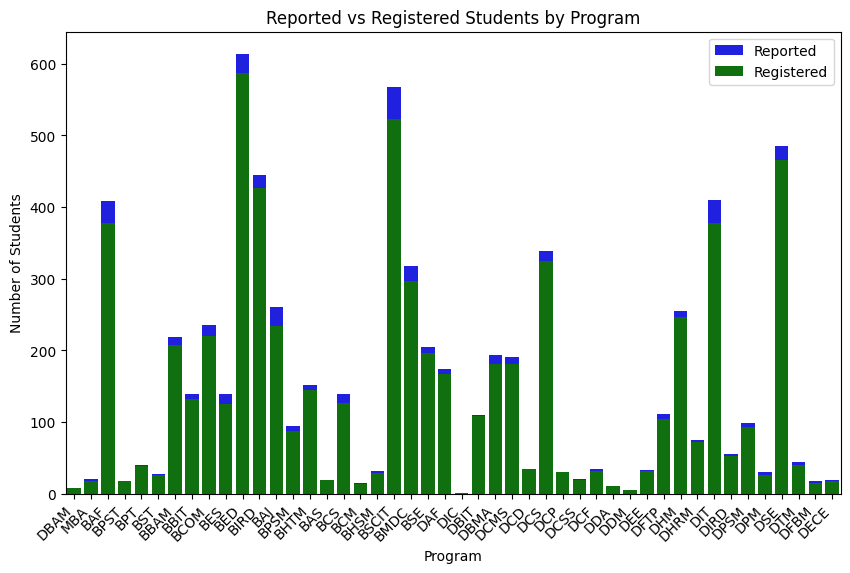

In [ ]:
# Bar plot for Reported vs Registered
plt.figure(figsize=(10, 6))
sns.barplot(x='Program', y='Reported', data=df, color='blue', label='Reported')
sns.barplot(x='Program', y='Registered', data=df, color='green', label='Registered')
plt.title('Reported vs Registered Students by Program')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Students')
plt.legend()
plt.show()

<ipython-input-6-4127b9919fea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Program', y='% Conversion', data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a

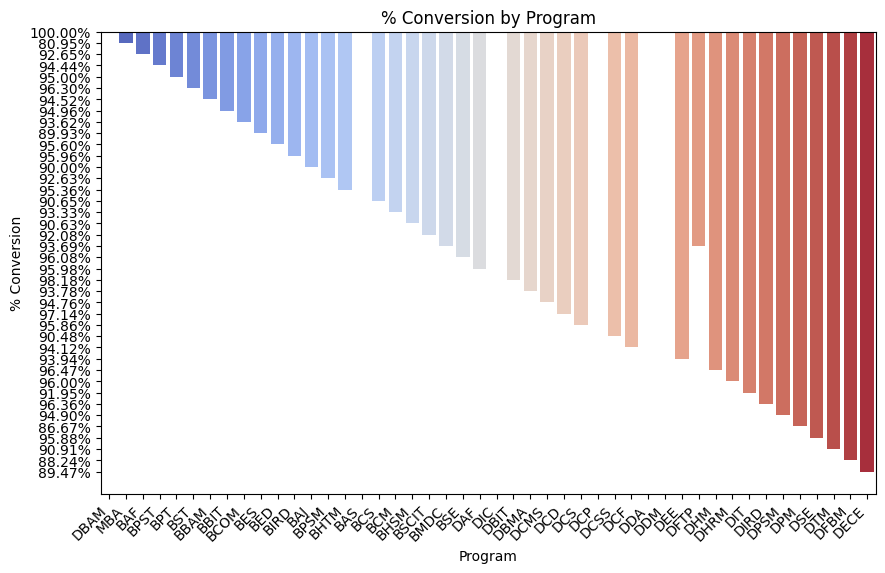

In [ ]:
# % Conversion plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Program', y='% Conversion', data=df, palette='coolwarm')
plt.title('% Conversion by Program')
plt.xticks(rotation=45, ha='right')
plt.ylabel('% Conversion')
plt.show()

In [ ]:
# Assuming df is your DataFrame and '% Conversion' is the problematic column
df['% Conversion'] = pd.to_numeric(df['% Conversion'], errors='coerce')


In [ ]:
# Assuming df is your DataFrame and '% Conversion' is the problematic column
df['% Conversion'] = pd.to_numeric(df['% Conversion'], errors='coerce')

# Define the number of top rows you want
n = 5  # or any number you want

# Now that the column is numeric, you can use nlargest
top_n = df.nlargest(n, '% Conversion')

# Print or use top_n as needed
print(top_n)

   S/N Program  Reported  Registered  % Conversion
0    1    DBAM         8           8           NaN
1    2     MBA        21          17           NaN
2    3     BAF       408         378           NaN
3    4    BPST        18          17           NaN
4    5     BPT        40          38           NaN


In [ ]:
# Now that the column is numeric, you can use nlargest
top_n = df.nlargest(n, '% Conversion')

In [ ]:
bottom_programs = df.nsmallest(5, '% Conversion')
print("Bottom 5 programs by % Conversion:")
print(bottom_programs[['Program', '% Conversion']])

Bottom 5 programs by % Conversion:
  Program  % Conversion
0    DBAM           NaN
1     MBA           NaN
2     BAF           NaN
3    BPST           NaN
4     BPT           NaN


In [ ]:
# Correlation between Reported and Registered
correlation = df[['Reported', 'Registered']].corr()
print(correlation)

            Reported  Registered
Reported    1.000000    0.999618
Registered  0.999618    1.000000


In [ ]:
# Assuming df is your DataFrame and '% Conversion' is the problematic column
df['% Conversion'] = pd.to_numeric(df['% Conversion'], errors='coerce')

# Define the number of top rows you want
n = 5  # or any number you want

# Get the top n rows based on '% Conversion'
top_programs = df.nlargest(n, '% Conversion')

# Now you can use top_programs
print(top_programs)

   S/N Program  Reported  Registered  % Conversion
0    1    DBAM         8           8           NaN
1    2     MBA        21          17           NaN
2    3     BAF       408         378           NaN
3    4    BPST        18          17           NaN
4    5     BPT        40          38           NaN


In [ ]:
# Save results
top_programs.to_csv('top_conversion_programs.csv', index=False)
bottom_programs.to_csv('low_conversion_programs.csv', index=False)